<a href="https://colab.research.google.com/github/noo-nine/Machine-Learning/blob/main/Regression_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from google.colab import files
uploaded = files.upload()

Saving penguins.csv to penguins (1).csv


In [39]:
penguins = pd.read_csv('penguins.csv')
penguins.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [40]:
penguins.shape

(344, 9)

In [41]:
penguins.drop( columns = ['Unnamed: 0', 'year'], inplace = True)

In [42]:
cols = penguins.columns
cols

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [43]:
penguins.columns = ['species', 'island', 'bill_length', 'bill_depth',
       'flipper_length', 'body_mass', 'sex']

In [44]:
penguins.columns

Index(['species', 'island', 'bill_length', 'bill_depth', 'flipper_length',
       'body_mass', 'sex'],
      dtype='object')

In [45]:
cols = penguins.columns

In [46]:
for col in cols:
  print(f'{col} : {penguins[col].unique()}')

species : ['Adelie' 'Gentoo' 'Chinstrap']
island : ['Torgersen' 'Biscoe' 'Dream']
bill_length : [39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 41.1 38.6 34.6
 36.6 38.7 42.5 34.4 46.  37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2
 40.9 36.4 42.2 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 37.5 42.3 40.1
 35.  34.5 41.4 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2
 42.1 42.9 35.1 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7
 40.2 35.2 41.5 38.5 43.1 36.8 35.6 32.1 40.7 46.1 50.  48.7 47.6 46.5
 45.4 46.7 43.3 46.8 49.  45.5 48.4 49.3 49.2 46.2 50.2 45.1 46.3 44.5
 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.  49.6 45.3 50.5 43.6 44.9 45.2
 46.6 48.5 50.1 45.  43.8 50.4 45.7 54.3 49.8 49.5 43.5 50.7 47.7 46.4
 48.6 47.5 51.1 52.5 47.4 50.8 43.4 51.3 52.1 52.2 49.4 46.9 55.9 47.2
 41.7 53.4 48.1 51.5 55.1 48.8 49.9 52.7 51.7 47.  52.  45.9 50.3 58.
 42.4 50.6 52.8 54.2 51.  49.7 53.5 50.9 51.4 51.9 55.8]
bill_depth : [18.7 17.4 18.   nan 19.3 20.6 17.8 19.6 18.1 20.2 17.

In [47]:
penguins.duplicated().sum()

0

In [48]:
penguins.isna().sum()

,0
species,0
island,0
bill_length,2
bill_depth,2
flipper_length,2
body_mass,2
sex,11


In [49]:
penguins.dropna(inplace = True)

In [50]:
penguins.isna().sum()

,0
species,0
island,0
bill_length,0
bill_depth,0
flipper_length,0
body_mass,0
sex,0


Scaling the numerical Parameters

In [51]:
num_features = ['bill_length', 'bill_depth', 'flipper_length', 'body_mass']

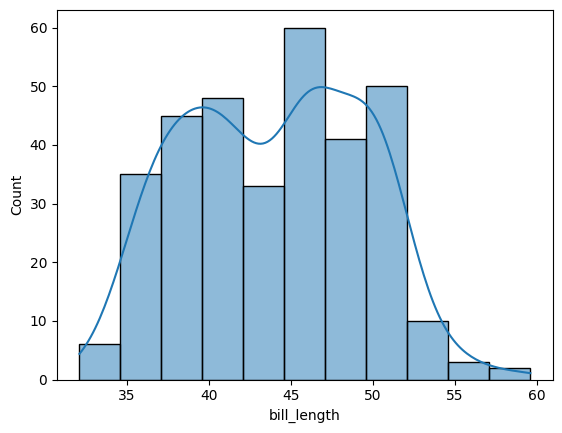

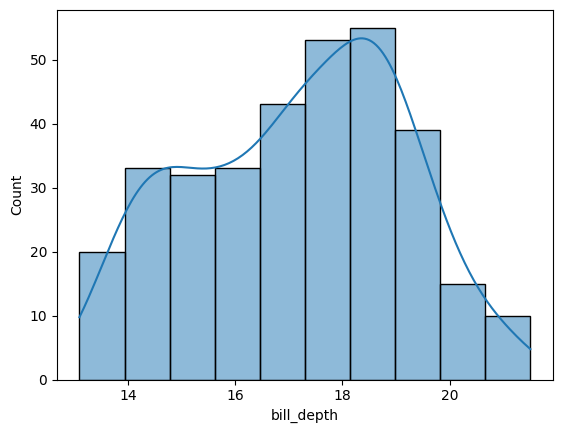

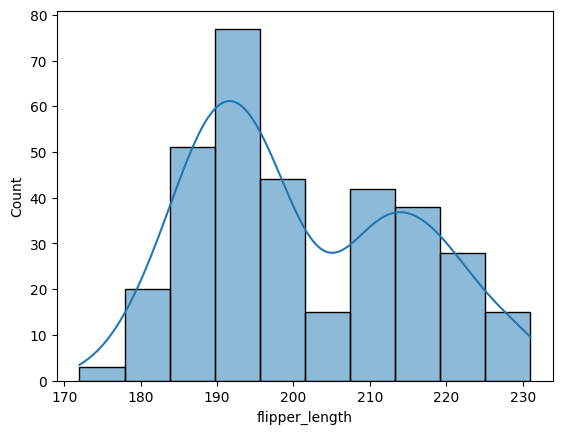

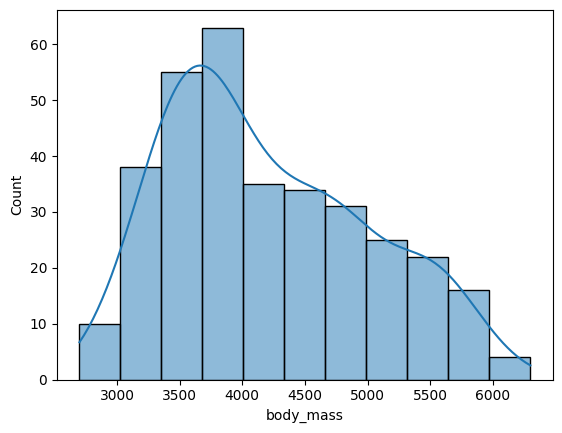

In [52]:
# plotting the features to get the idea of distribution
for feature in num_features:
  plt.figure()
  sns.histplot( data = penguins, x = feature, kde = True)
  plt.show()

In [55]:
# getting rid of outliers
for feature in num_features:
  q1 = penguins[feature].quantile(0.25)
  q3 = penguins[feature].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  penguins = penguins[ (penguins[feature] >= lower_bound) & (penguins[feature] <= upper_bound)]

In [56]:
penguins.shape

(333, 7)

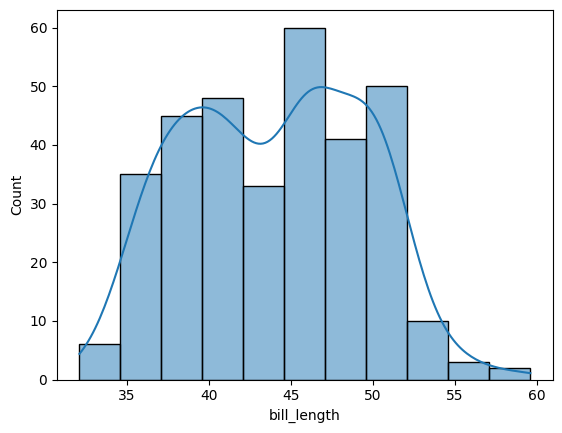

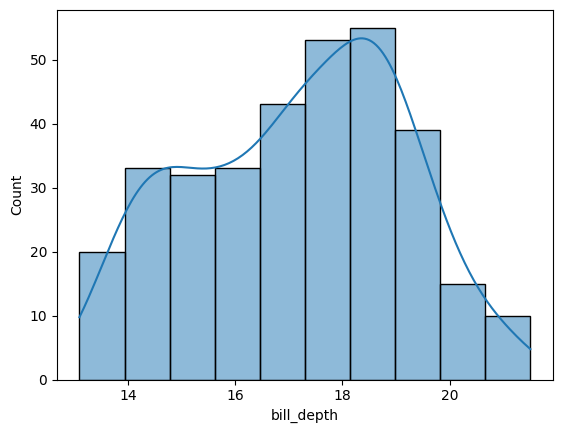

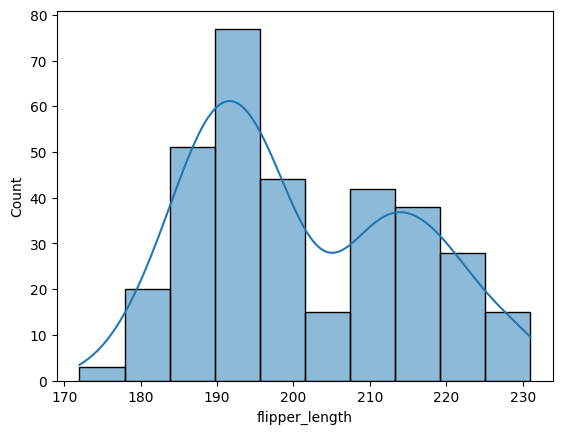

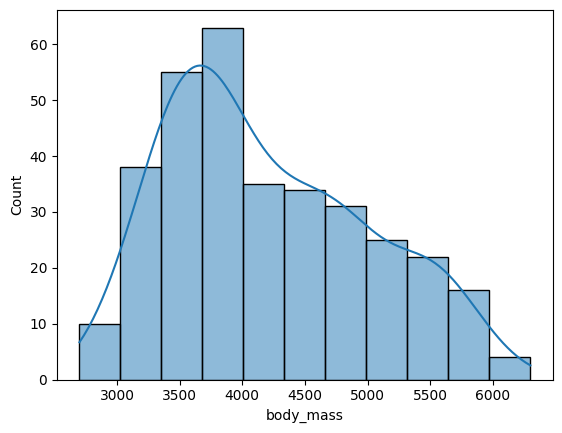

In [57]:
for feature in num_features:
  plt.figure()
  sns.histplot( data = penguins, x = feature, kde = True)
  plt.show()